In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 로아 내 기본변수
min_s_rate = 5 # 최소확률
max_s_rate = 10 # 최대확률

gahomax = 6 # 가호 최대 개수

In [3]:
# 로아 내 강화재료 가격
stone_gold = 0 # 파괴수호석 (1개당)
debri_gold = 0 # 파편 (1개당)

# 로아 내 추가재료 가격 (추후 반영)
gahogold = 0
chukgold = 0
eungold = 0

In [4]:
# 재련당 재료 투하
stones = 0
debris = 0
gold = 365 # 재련 당 골드

In [5]:
# 로아 내 기본상수
k_rate = .465
step_s_rate = (max_s_rate - min_s_rate) / 10

chukmax = gahomax * 3
eunmax = gahomax * 6

gaho_rate, chuk_rate, eun_rate = min_s_rate / 3 / gahomax, min_s_rate / 3 / chukmax, min_s_rate / 3 / eunmax

In [8]:
s_rate = np.concatenate((np.arange(min_s_rate, max_s_rate + 1, step_s_rate), np.ones(240) * max_s_rate)) / 100 # 각 시도별 성공확률
s_rate += .05

k = k_rate * np.concatenate(([0], s_rate[:-1])) # 각 시도별 장인의 기운 누적량

In [9]:
s_rate_mat = np.diag(s_rate)

for i in range(s_rate_mat.shape[0]):
    for j in range(i):
        s_rate_mat[i,j] = s_rate_mat[j,j]

all_success = 1 - (1 - s_rate_mat).prod(axis = 1) # i+1 회 이내에 강화성공확률

In [10]:
k_rate_mat = np.diag(k)
for i in range(k_rate_mat.shape[0]):
    for j in range(i):
        k_rate_mat[i,j] = k[j]
nth_kiwoon = k_rate_mat.sum(axis = 1) # i+1 회시에 장인의 기운 누적량

In [11]:
ki100 = (nth_kiwoon < 1).sum() + 1 # 장기백 달성 강화 시도 횟수

In [12]:
# 장기백 사이즈로 결과값 재조정
all_success = all_success[:ki100]
nth_kiwoon = nth_kiwoon[:ki100]
s_rate_mat = s_rate_mat[:ki100, :ki100]

all_success[-1] = 1 # 마지막 재련은 강화확률 1

In [13]:
meanmat = 1 - s_rate_mat
meanmat[np.diag_indices(meanmat.shape[0])] = 1 - meanmat[np.diag_indices(meanmat.shape[0])]
meanmat[-1, -1] = 1

nth_success = meanmat.prod(1) # 정확히 i+1 회에 강화성공할 확률
mean_times = (nth_success * np.arange(1, 1+len(nth_success))) # 각 강화횟수별 기대값

Text(0.5, 0, "Achieved Rate of 'ki100' : 8.61509%\n'ki100' : 18")

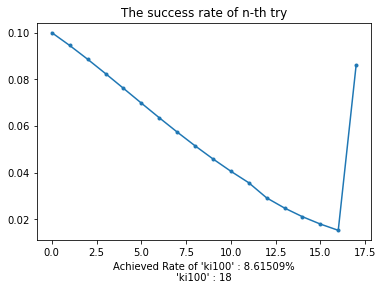

In [14]:
plt.plot(nth_success, '.-')
plt.title('The success rate of n-th try')
plt.xlabel('Achieved Rate of \'ki100\' : {:.5f}%\n\'ki100\' : {}'.format(nth_success[-1]*100, ki100))

Text(0.5, 0, 'Mean Smithing Times : 7.518858823616652')

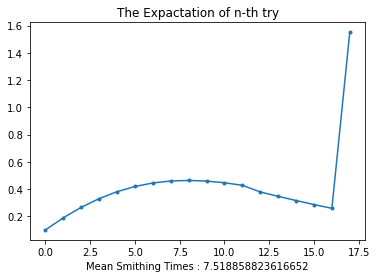

In [15]:
plt.plot(mean_times, '.-')
plt.title('The Expactation of n-th try')
plt.xlabel('Mean Smithing Times : {}'.format(mean_times.sum())) # 평균 기대 횟수

Text(0.5, 1.0, 'Cumulative Success')

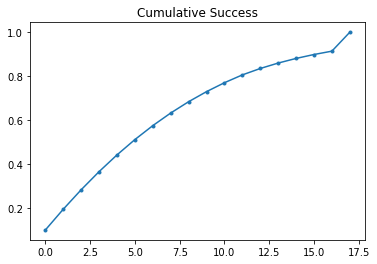

In [16]:
plt.plot(all_success, '.-')
plt.title('Cumulative Success')